In [1]:
%matplotlib inline

In [62]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn

import sklearn
from sklearn.linear_model import LogisticRegression

from utils import effectiveDimension, factorize, gram, hiddenTargets


In [25]:
def genPt(r):
    angle = random.random() * 2 * 3.14159
    offset = np.random.randn() * .5
    x = (r + offset) * math.cos(angle)
    y = (r + offset) * math.sin(angle)
    return (x,y)

def genPts(r, n):
    ret = []
    for i in range(n):
        ret.append(genPt(r))
        
    return ret

In [52]:
nPerClass = 500

In [26]:
pluses = genPts(5,nPerClass)
minuses = genPts(20,nPerClass)
X = np.array([[x1, x2] for (x1, x2) in pluses] + [[x1, x2] for (x1, x2) in minuses])
y = np.array([1] * len(pluses) + [-1] * len(minuses))

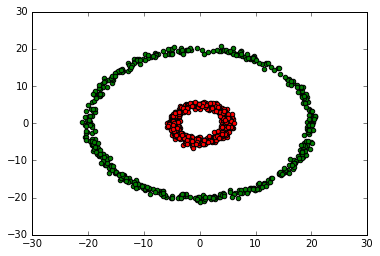

In [27]:
plt.scatter([x for (x,_) in pluses], [y for (_,y) in pluses], c='r')
plt.scatter([x for (x,_) in minuses], [y for (_,y) in minuses], c='g')

In [28]:
model = LogisticRegression(C=1)
model.fit(X, y)
print(model.score(X, y))

0.516


In [29]:
from time import time
import os
from os.path import isdir, join
from glob import fnmatch

def filePrefix(alpha):
    '''x is a float.'''
    s = '{0:.12f}'.format(alpha)
    prefix = s.replace('.', '_')
    return 'alpha_' + (prefix if len(prefix) == 3 else prefix + '0') + '_'


def createSaveDirectory():
    '''Creates a unique directory in data/ based on timestamp.'''
    directoryName = str(int(time()))
    path = join('data', directoryName)
    !mkdir $path
    assert isdir(path), 'Directory does not exist\n{0}'.format(path)
    return path

    
def save(arr, alpha, path, which): 
    '''
    arr: The numpy array to save.
    alpha: The alpha associated with this calculation. See above definition.
    path: the directory to store the data.
    which: either "eigvals" or "H".
    
    returns an iterator of stored eigvals or H.
    '''
    fname = join(path, filePrefix(alpha) + which)
    np.save(fname, arr)
    print('Saved: ' + fname)
  

def load(path, which):
    '''
    path: the directory of the data.
    which: either "eigvals" or "H".
    
    returns an iterator of stored eigvals or H.
    '''
    fnames = fnmatch.filter(os.listdir(path), '*{0}*'.format(which))
    for fname in sorted(fnames):
        fullPath = join(path, fname)
        print('Loading: {0}'.format(fullPath))
        yield np.load(fullPath)

In [38]:
def computeHiddenTargets(alphas, X, y):
    XG = gram(X)
    YG = gram(y[:, np.newaxis])

    path = createSaveDirectory()
    print('Saving results in dir: ' + path)
    for alpha in alphas:
        H, eigvals = hiddenTargets(XG, YG, alpha)
        save(H, alpha, path, 'H')
        save(eigvals, alpha, path, 'eigvals')
        
    np.save(join(path, 'X'), X)
    np.save(join(path, 'y'), y)


# alphas = np.arange(.98, 1, .001)
alphas = np.arange(0, 1.05, .05)
# alphas = np.arange(1e-5, 1e-3, 1e-5)

computeHiddenTargets(alphas, X, y)


Saving results in dir: data/1457917178
Saved: data/1457917178/alpha_0_0000000000000_H
Saved: data/1457917178/alpha_0_0000000000000_eigvals
Saved: data/1457917178/alpha_0_0500000000000_H
Saved: data/1457917178/alpha_0_0500000000000_eigvals
Saved: data/1457917178/alpha_0_1000000000000_H
Saved: data/1457917178/alpha_0_1000000000000_eigvals
Saved: data/1457917178/alpha_0_1500000000000_H
Saved: data/1457917178/alpha_0_1500000000000_eigvals
Saved: data/1457917178/alpha_0_2000000000000_H
Saved: data/1457917178/alpha_0_2000000000000_eigvals
Saved: data/1457917178/alpha_0_2500000000000_H
Saved: data/1457917178/alpha_0_2500000000000_eigvals
Saved: data/1457917178/alpha_0_3000000000000_H
Saved: data/1457917178/alpha_0_3000000000000_eigvals
Saved: data/1457917178/alpha_0_3500000000000_H
Saved: data/1457917178/alpha_0_3500000000000_eigvals
Saved: data/1457917178/alpha_0_4000000000000_H
Saved: data/1457917178/alpha_0_4000000000000_eigvals
Saved: data/1457917178/alpha_0_4500000000000_H
Saved: data/14

In [39]:
acc_train = []
for H in load('data/1457917178/', which='H'):
    print(H.shape)
    model = LogisticRegression(C=1)
    model.fit(H, y)
    print(model.coef_)
    acc_train.append(model.score(H, y))

Loading: data/1457917178/alpha_0_0000000000000_H.npy
(1000, 2)
[[ 0.00739563 -0.00458884]]
Loading: data/1457917178/alpha_0_0500000000000_H.npy
(1000, 3)
[[  1.46014260e-02  -9.03646375e-03  -1.25972854e+01]]
Loading: data/1457917178/alpha_0_1000000000000_H.npy
(1000, 3)
[[  1.70014993e-02  -1.05212466e-02  -1.06203433e+01]]
Loading: data/1457917178/alpha_0_1500000000000_H.npy
(1000, 3)
[[ 0.0187438  -0.01159902 -9.50520512]]
Loading: data/1457917178/alpha_0_2000000000000_H.npy
(1000, 3)
[[ 0.02026376 -0.01253858 -8.74971751]]
Loading: data/1457917178/alpha_0_2500000000000_H.npy
(1000, 3)
[[ 0.02169607 -0.01342467 -8.18859648]]
Loading: data/1457917178/alpha_0_3000000000000_H.npy
(1000, 3)
[[ 0.02311684  0.01430313 -7.74692867]]
Loading: data/1457917178/alpha_0_3500000000000_H.npy
(1000, 3)
[[ 0.02458139  0.01520919 -7.38549959]]
Loading: data/1457917178/alpha_0_4000000000000_H.npy
(1000, 3)
[[ 0.02612106 -0.01616022 -7.08283221]]
Loading: data/1457917178/alpha_0_4500000000000_H.npy
(1

[0.51600000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


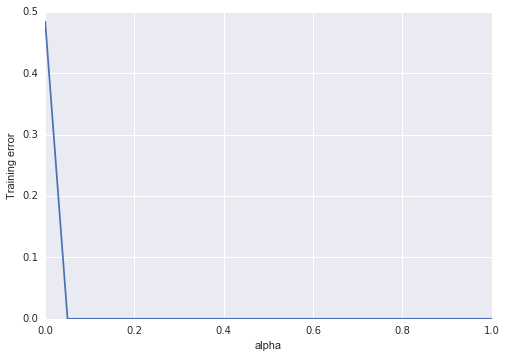

In [63]:
print(acc_train)
plt.plot(alphas, 1 - np.array(acc_train))
plt.ylim((0, 0.5))
plt.xlabel('alpha')
plt.ylabel('Training error')

Loading: data/1457917178/alpha_0_0000000000000_H.npy


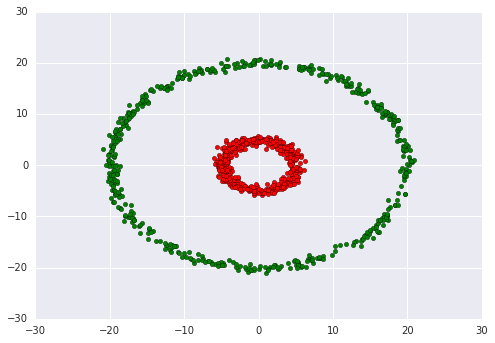

Loading: data/1457917178/alpha_0_0500000000000_H.npy


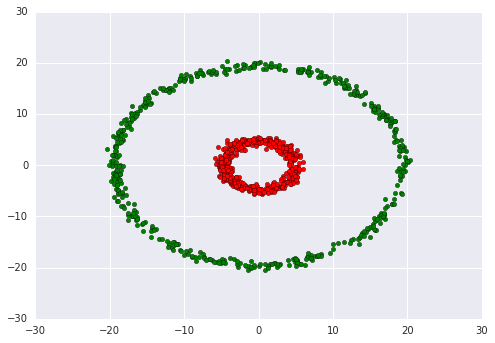

Loading: data/1457917178/alpha_0_1000000000000_H.npy


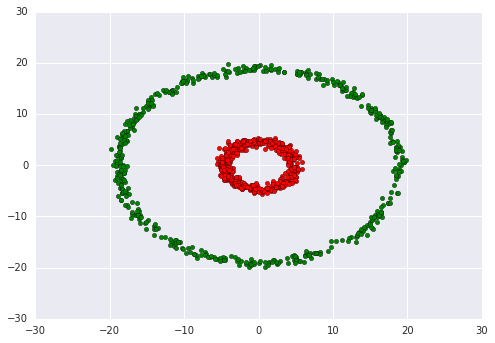

Loading: data/1457917178/alpha_0_1500000000000_H.npy


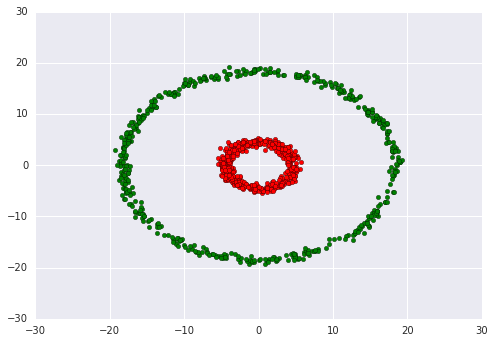

Loading: data/1457917178/alpha_0_2000000000000_H.npy


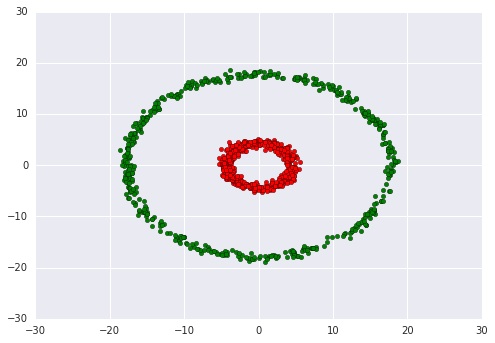

Loading: data/1457917178/alpha_0_2500000000000_H.npy


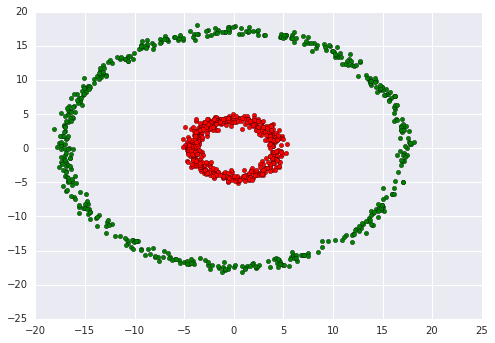

Loading: data/1457917178/alpha_0_3000000000000_H.npy


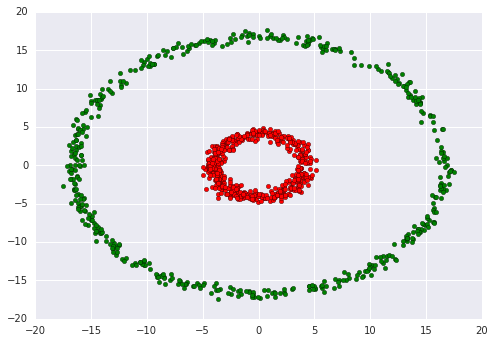

Loading: data/1457917178/alpha_0_3500000000000_H.npy


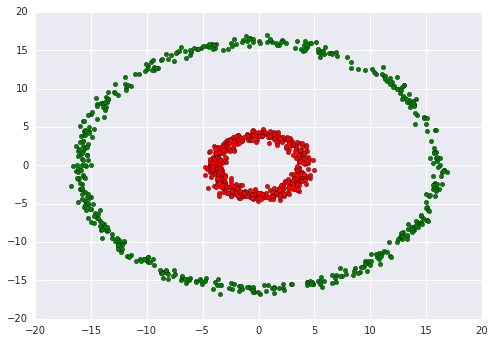

Loading: data/1457917178/alpha_0_4000000000000_H.npy


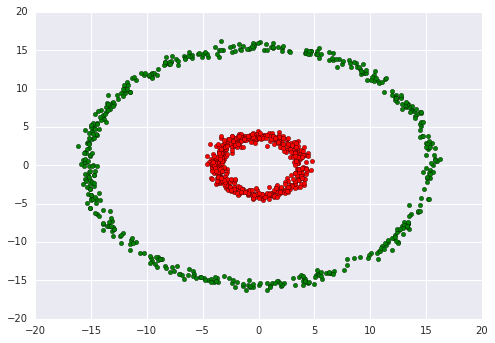

Loading: data/1457917178/alpha_0_4500000000000_H.npy


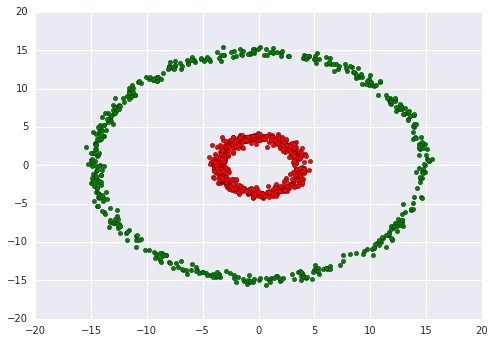

Loading: data/1457917178/alpha_0_5000000000000_H.npy


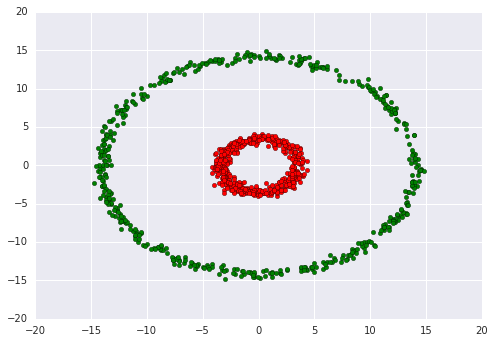

Loading: data/1457917178/alpha_0_5500000000000_H.npy


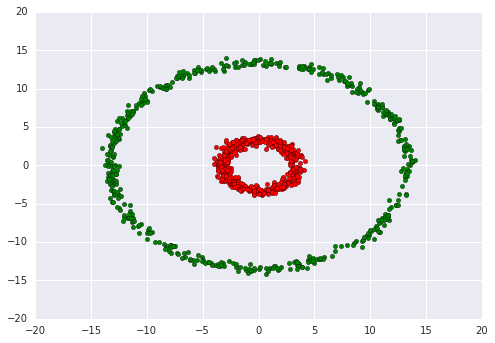

Loading: data/1457917178/alpha_0_6000000000000_H.npy


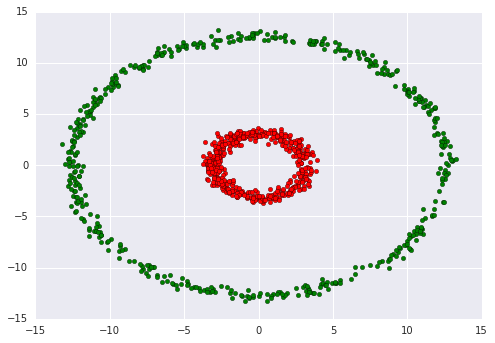

Loading: data/1457917178/alpha_0_6500000000000_H.npy


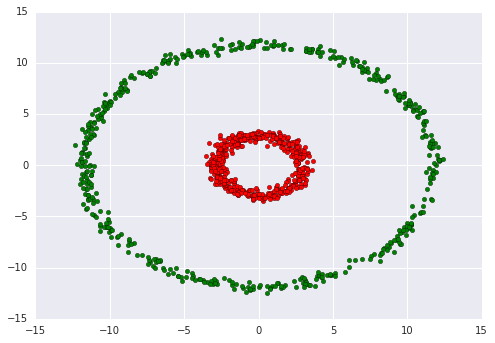

Loading: data/1457917178/alpha_0_7000000000000_H.npy


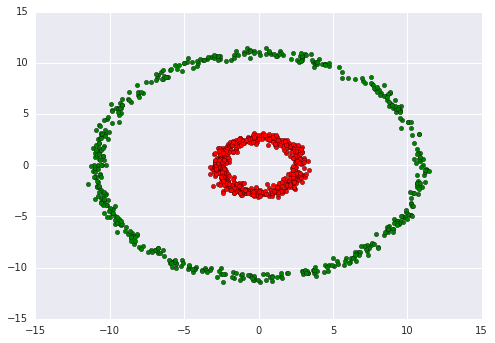

Loading: data/1457917178/alpha_0_7500000000000_H.npy


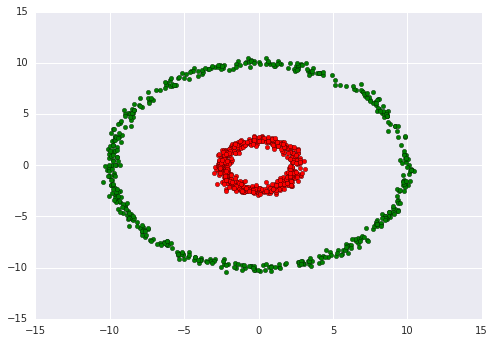

Loading: data/1457917178/alpha_0_8000000000000_H.npy


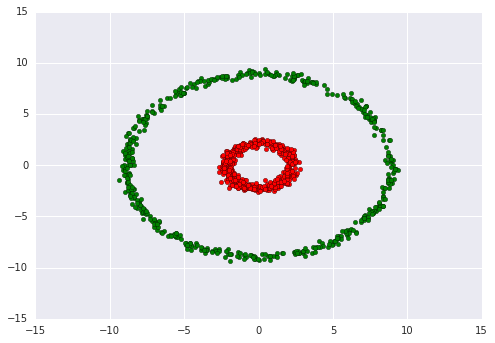

Loading: data/1457917178/alpha_0_8500000000000_H.npy


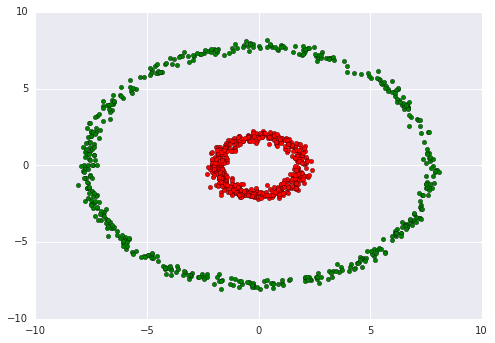

Loading: data/1457917178/alpha_0_9000000000000_H.npy


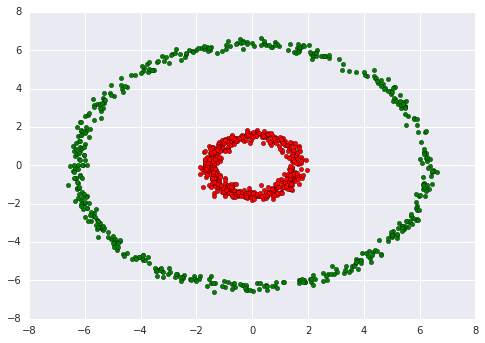

Loading: data/1457917178/alpha_0_9500000000000_H.npy


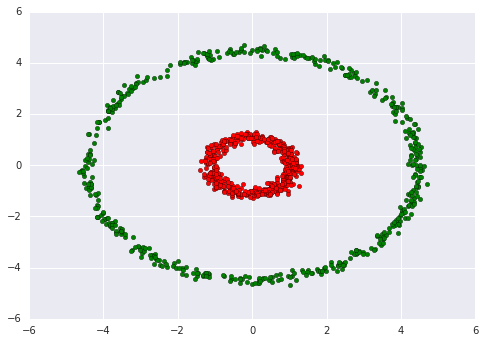

Loading: data/1457917178/alpha_1_0000000000000_H.npy


IndexError: index 1 is out of bounds for axis 0 with size 1

In [64]:
for H in load('data/1457917178/', which='H'):
    plt.scatter([x[0] for x in H[:nPerClass]], [x[1] for x in H[:nPerClass]], c='r')
    plt.scatter([x[0] for x in H[nPerClass:]], [x[1] for x in H[nPerClass:]], c='g')
    plt.show()
#     print(H[:,2])
# plt.scatter([x for [x,_,_] in H], [y for [_,y,_] in H], c='g')

Loading: data/1457917178/alpha_0_0000000000000_H.npy
Loading: data/1457917178/alpha_0_0500000000000_H.npy


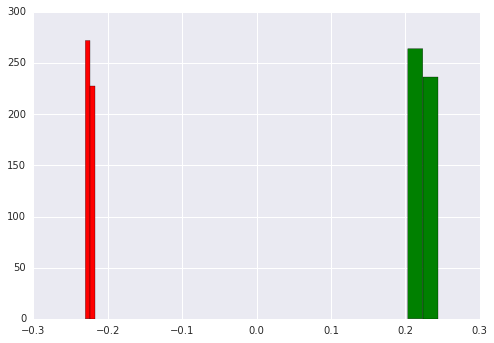

Loading: data/1457917178/alpha_0_1000000000000_H.npy


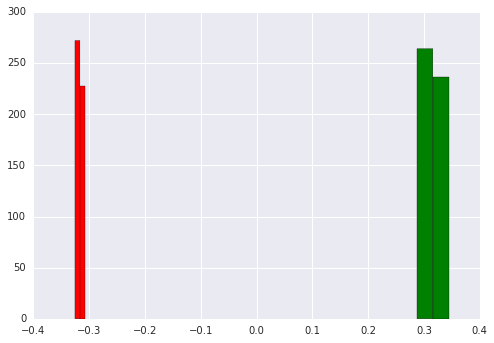

Loading: data/1457917178/alpha_0_1500000000000_H.npy


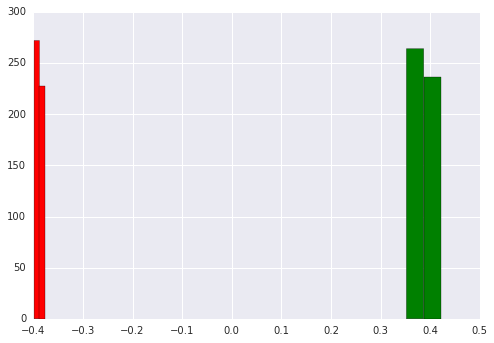

Loading: data/1457917178/alpha_0_2000000000000_H.npy


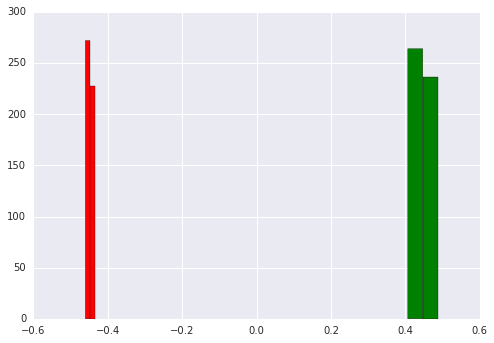

Loading: data/1457917178/alpha_0_2500000000000_H.npy


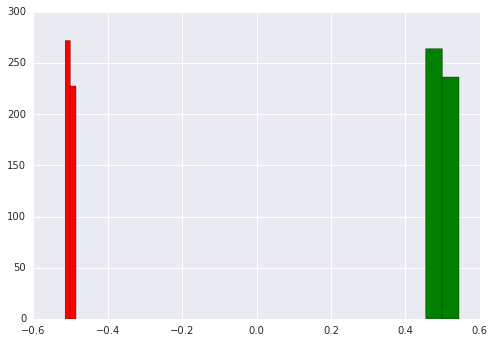

Loading: data/1457917178/alpha_0_3000000000000_H.npy


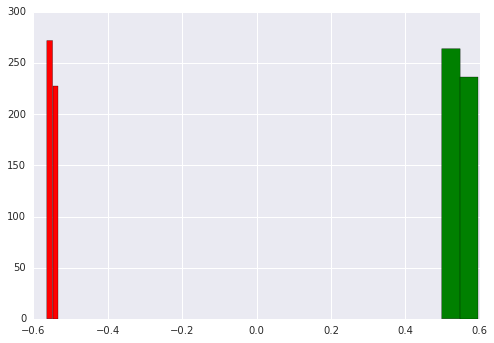

Loading: data/1457917178/alpha_0_3500000000000_H.npy


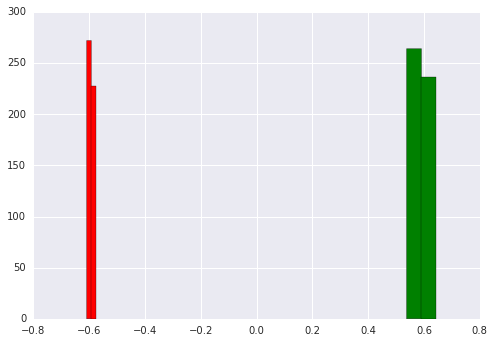

Loading: data/1457917178/alpha_0_4000000000000_H.npy


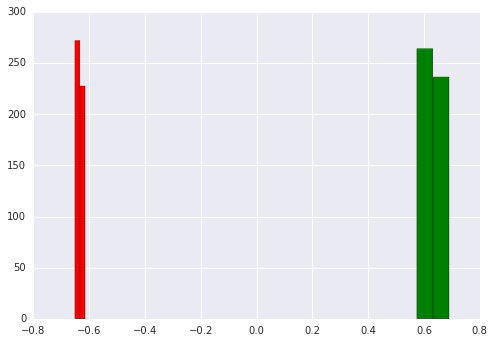

Loading: data/1457917178/alpha_0_4500000000000_H.npy


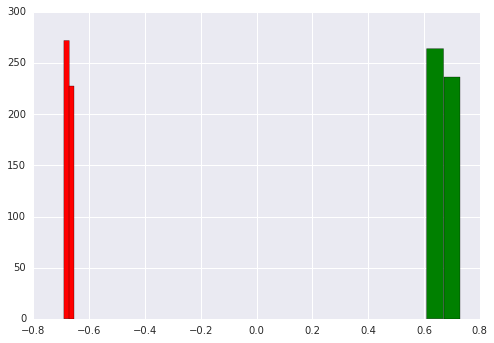

Loading: data/1457917178/alpha_0_5000000000000_H.npy


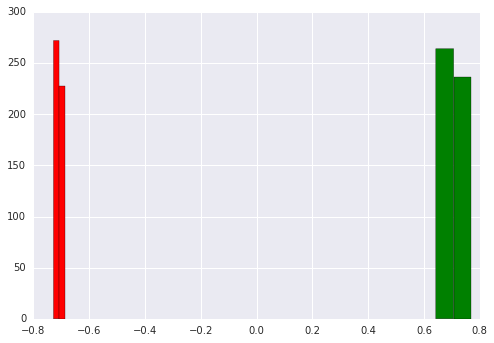

Loading: data/1457917178/alpha_0_5500000000000_H.npy


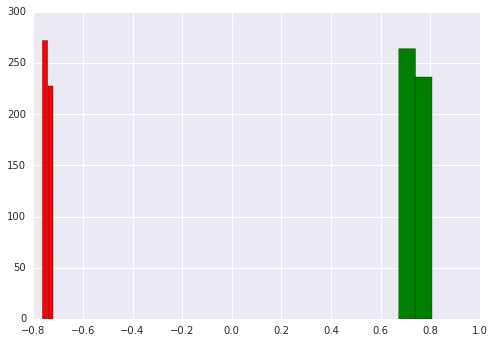

Loading: data/1457917178/alpha_0_6000000000000_H.npy


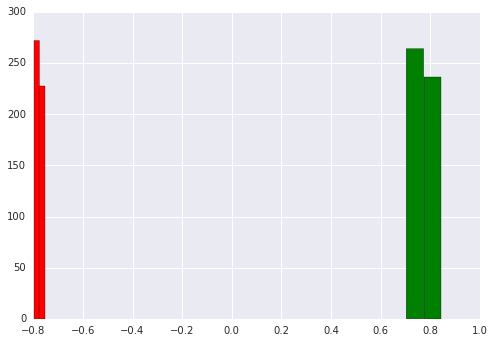

Loading: data/1457917178/alpha_0_6500000000000_H.npy


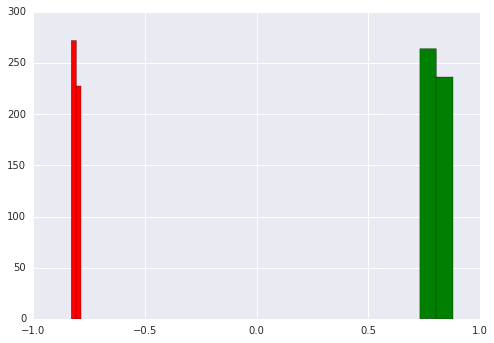

Loading: data/1457917178/alpha_0_7000000000000_H.npy


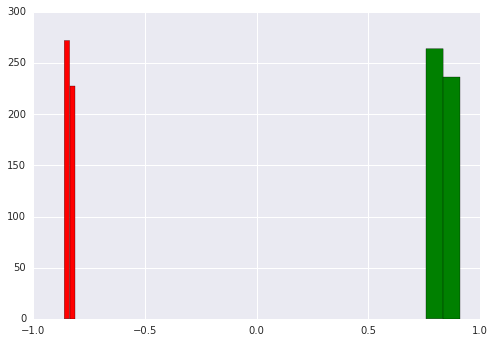

Loading: data/1457917178/alpha_0_7500000000000_H.npy


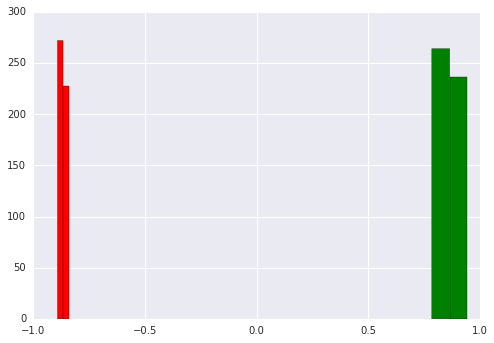

Loading: data/1457917178/alpha_0_8000000000000_H.npy


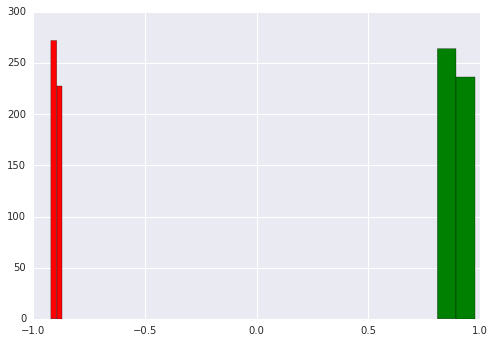

Loading: data/1457917178/alpha_0_8500000000000_H.npy


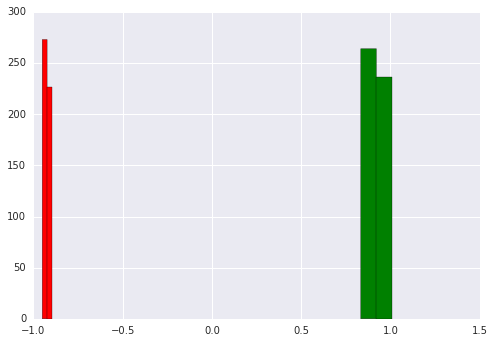

Loading: data/1457917178/alpha_0_9000000000000_H.npy


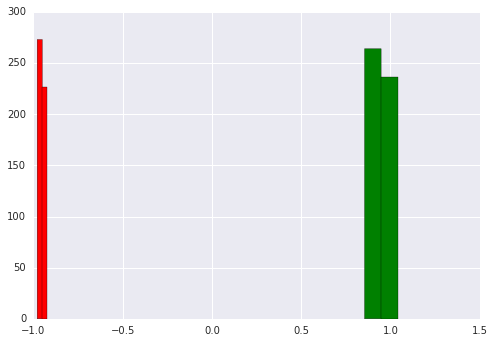

Loading: data/1457917178/alpha_0_9500000000000_H.npy


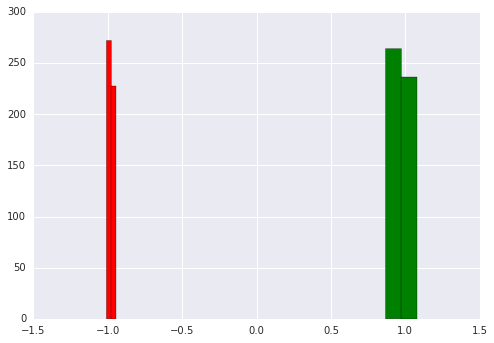

Loading: data/1457917178/alpha_1_0000000000000_H.npy


In [65]:
for H in load('data/1457917178/', which='H'):
    (_, d) = H.shape
    if (d > 2):
        plt.hist(H[:nPerClass, 2], bins=2, color='r')
        plt.hist(H[nPerClass:, 2], bins=2, color='g')
        plt.show()
#         hist, bins = np.histogram(H[:,2], bins=50)
#         center = (bins[:-1] + bins[1:]) / 2
#         width = 0.7 * (bins[1] - bins[0])
#         plt.bar(center, hist, align='center', width=width)
#         plt.show()